# 06 Compare Metrics

Here the integrated spectra and experimental fit spectra are compared with three different measures of closeness.
These metrics are root mean squared error, R-squared, and Spearman's rank correlation coefficient.
Then the best fit by each metric is shown to determine qualitatively which metric is better for evaluating fits.  

In [1]:
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy.stats import spearmanr
import pandas as pd

In [2]:
# fit and resize spectra are different lengths so they can't be put in a dataframe
with open('./training_data/05_int_spectra.csv') as f:
    int_spectra = f.readlines()
with open('./training_data/05_fit_spectra.csv') as f:
    fit_spectra = f.readlines()
with open('./training_data/05_resize_spectra.csv') as f:
    resize_spectra = f.readlines()
with open('./training_data/05_elements.csv') as f:
    elements = f.readlines()
with open('./training_data/05_fit_params_standard.csv') as f:
    fit_params_standard = f.readlines()

In [3]:
print(len(fit_spectra))
print(len(resize_spectra))
print(len(elements))
print(len(fit_params_standard))
# Sanity check that number of spectra match

34641
34641
34642
34642


In [4]:
all_rmse = []
all_spear = []
all_r2 = []
all_fit_spectra = []
all_resize_spectra = []
for i in range(len(fit_spectra)):
    fit = np.array(fit_spectra[i].strip().split(',')).astype(float)  
    expected = np.array(resize_spectra[i].strip().split(',')).astype(float) 
    all_fit_spectra.append(fit)
    all_resize_spectra.append(expected)
    all_rmse.append(mean_squared_error(expected, fit))
    all_r2.append(r2_score(expected, fit))
    all_spear.append(spearmanr(expected, fit).statistic)

In [5]:
print(max(all_rmse))
print(min(all_rmse)) #low is better
print(max(all_spear)) #high is better
print(min(all_spear))
print(max(all_r2)) #high is better
print(min(all_r2))

11510722570.176527
10.264068747166634
0.9934621873229526
0.29317602000601356
0.9995572102696424
-22.247969200234962


In [6]:
# Sort the indicies to rank each fit in order
df = pd.DataFrame(all_rmse, columns=['values'])
sorted_rmse_indices = df['values'].sort_values().index.tolist()
df = pd.DataFrame(all_spear, columns=['values'])
sorted_spear_indices = df['values'].sort_values(ascending=False).index.tolist()
df = pd.DataFrame(all_r2, columns=['values'])
sorted_r2_indices = df['values'].sort_values(ascending=False).index.tolist()

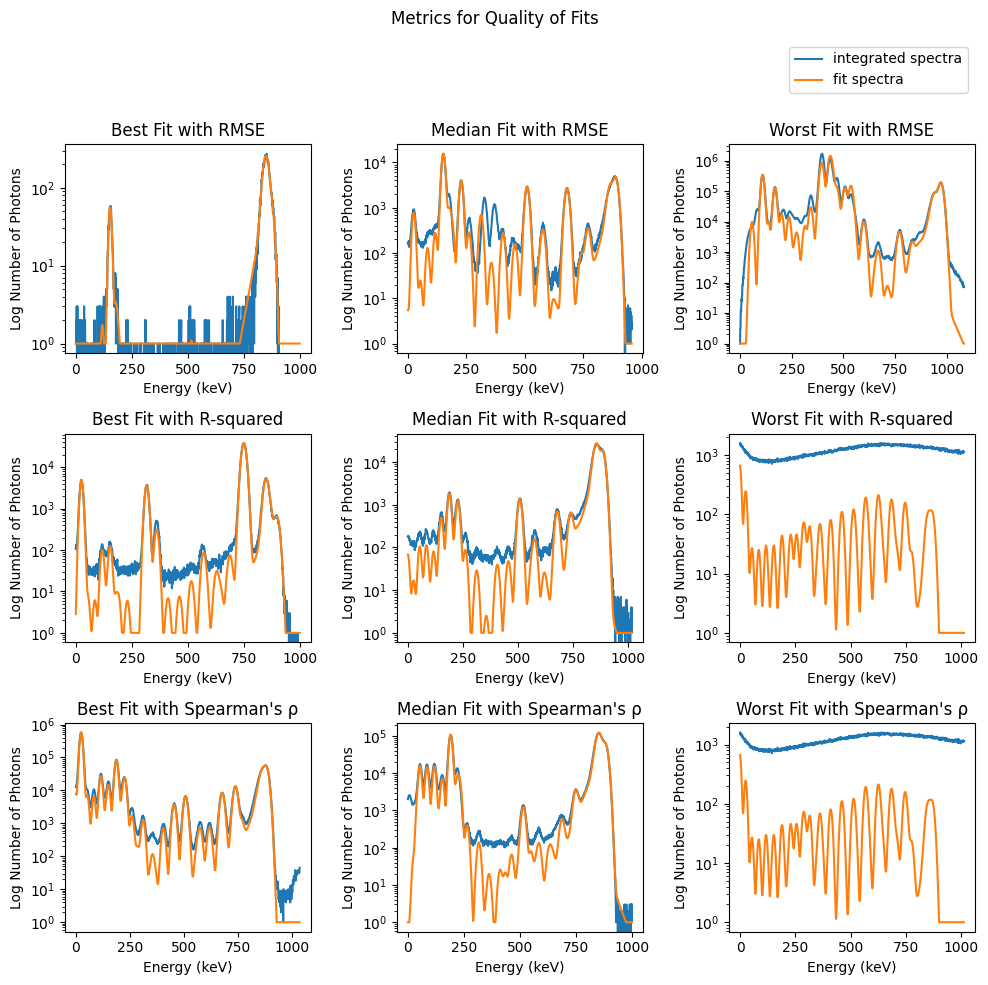

In [7]:
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

# Best fits
idx = sorted_rmse_indices[0]
spectra = all_resize_spectra[idx]
fit_spec = all_fit_spectra[idx] 
i_ax = np.linspace(0, len(spectra) - 1, len(spectra))
f_ax = np.linspace(0, len(fit_spec) - 1, len(fit_spec))
axs[0][0].plot(i_ax, spectra, label="integrated spectra")
axs[0][0].set_yscale('log')
axs[0][0].plot(f_ax, fit_spec, label="fit spectra")
axs[0][0].set_ylabel('Log Number of Photons')
axs[0][0].set_xlabel('Energy (keV)')
axs[0][0].set_title("Best Fit with RMSE")

idx = sorted_r2_indices[0]
spectra = all_resize_spectra[idx]
fit_spec = all_fit_spectra[idx] 
i_ax = np.linspace(0, len(spectra) - 1, len(spectra))
f_ax = np.linspace(0, len(fit_spec) - 1, len(fit_spec))
axs[1][0].plot(i_ax, spectra, label="integrated spectra")
axs[1][0].set_yscale('log')
axs[1][0].plot(f_ax, fit_spec, label="fit spectra")
axs[1][0].set_ylabel('Log Number of Photons')
axs[1][0].set_xlabel('Energy (keV)')
axs[1][0].set_title("Best Fit with R-squared")

idx = sorted_spear_indices[0]
spectra = all_resize_spectra[idx]
fit_spec = all_fit_spectra[idx] 
i_ax = np.linspace(0, len(spectra) - 1, len(spectra))
f_ax = np.linspace(0, len(fit_spec) - 1, len(fit_spec))
axs[2][0].plot(i_ax, spectra, label="integrated spectra")
axs[2][0].set_yscale('log')
axs[2][0].plot(f_ax, fit_spec, label="fit spectra")
axs[2][0].set_ylabel('Log Number of Photons')
axs[2][0].set_xlabel('Energy (keV)')
axs[2][0].set_title("Best Fit with Spearman's ρ")

# Median fits
idx = sorted_rmse_indices[len(sorted_rmse_indices) // 2]
spectra = all_resize_spectra[idx]
fit_spec = all_fit_spectra[idx] 
i_ax = np.linspace(0, len(spectra) - 1, len(spectra))
f_ax = np.linspace(0, len(fit_spec) - 1, len(fit_spec))
axs[0][1].plot(i_ax, spectra, label="integrated spectra")
axs[0][1].set_yscale('log')
axs[0][1].plot(f_ax, fit_spec, label="fit spectra")
axs[0][1].set_ylabel('Log Number of Photons')
axs[0][1].set_xlabel('Energy (keV)')
axs[0][1].set_title("Median Fit with RMSE")

idx = sorted_r2_indices[len(sorted_r2_indices) // 2]
spectra = all_resize_spectra[idx]
fit_spec = all_fit_spectra[idx] 
i_ax = np.linspace(0, len(spectra) - 1, len(spectra))
f_ax = np.linspace(0, len(fit_spec) - 1, len(fit_spec))
axs[1][1].plot(i_ax, spectra, label="integrated spectra")
axs[1][1].set_yscale('log')
axs[1][1].plot(f_ax, fit_spec, label="fit spectra")
axs[1][1].set_ylabel('Log Number of Photons')
axs[1][1].set_xlabel('Energy (keV)')
axs[1][1].set_title("Median Fit with R-squared")

idx = sorted_spear_indices[len(sorted_spear_indices) // 2]
spectra = all_resize_spectra[idx]
fit_spec = all_fit_spectra[idx] 
i_ax = np.linspace(0, len(spectra) - 1, len(spectra))
f_ax = np.linspace(0, len(fit_spec) - 1, len(fit_spec))
axs[2][1].plot(i_ax, spectra, label="integrated spectra")
axs[2][1].set_yscale('log')
axs[2][1].plot(f_ax, fit_spec, label="fit spectra")
axs[2][1].set_ylabel('Log Number of Photons')
axs[2][1].set_xlabel('Energy (keV)')
axs[2][1].set_title("Median Fit with Spearman's ρ")

# Worst fits
idx = sorted_rmse_indices[-1]
spectra = all_resize_spectra[idx]
fit_spec = all_fit_spectra[idx] 
i_ax = np.linspace(0, len(spectra) - 1, len(spectra))
f_ax = np.linspace(0, len(fit_spec) - 1, len(fit_spec))
axs[0][2].plot(i_ax, spectra, label="integrated spectra")
axs[0][2].set_yscale('log')
axs[0][2].plot(f_ax, fit_spec, label="fit spectra")
axs[0][2].set_ylabel('Log Number of Photons')
axs[0][2].set_xlabel('Energy (keV)')
axs[0][2].set_title("Worst Fit with RMSE")
axs[0][2].legend(loc='upper right', bbox_to_anchor=(1, 1.5))

idx = sorted_r2_indices[-1]
spectra = all_resize_spectra[idx]
fit_spec = all_fit_spectra[idx] 
i_ax = np.linspace(0, len(spectra) - 1, len(spectra))
f_ax = np.linspace(0, len(fit_spec) - 1, len(fit_spec))
axs[1][2].plot(i_ax, spectra, label="integrated spectra")
axs[1][2].set_yscale('log')
axs[1][2].plot(f_ax, fit_spec, label="fit spectra")
axs[1][2].set_ylabel('Log Number of Photons')
axs[1][2].set_xlabel('Energy (keV)')
axs[1][2].set_title("Worst Fit with R-squared")

idx = sorted_spear_indices[-1]
spectra = all_resize_spectra[idx]
fit_spec = all_fit_spectra[idx] 
i_ax = np.linspace(0, len(spectra) - 1, len(spectra))
f_ax = np.linspace(0, len(fit_spec) - 1, len(fit_spec))
axs[2][2].plot(i_ax, spectra, label="integrated spectra")
axs[2][2].set_yscale('log')
axs[2][2].plot(f_ax, fit_spec, label="fit spectra")
axs[2][2].set_ylabel('Log Number of Photons')
axs[2][2].set_xlabel('Energy (keV)')
axs[2][2].set_title("Worst Fit with Spearman's ρ")

plt.suptitle("Metrics for Quality of Fits")
plt.tight_layout()
# Save the image 
plt.savefig("MetricsForQualityOfFits.png")
plt.show()

In [36]:
with open('./training_data/06_int_spectra.csv', 'w') as f_int:
    with open('./training_data/06_resize_spectra.csv', 'w') as f_resize:
        with open('./training_data/06_fit_spectra.csv', 'w') as f_fit:
            with open('./training_data/06_elements.csv', 'w') as f_elem:
                with open('./training_data/06_fit_params_standard.csv', 'w') as f_param:
                    # write headers
                    f_elem.write(elements[0])
                    f_param.write(fit_params_standard[0])
                    for i in range(len(int_spectra)):
                        if all_r2[i] > 0.8 and all_spear[i] > 0.8:
                            f_int.write(int_spectra[i])                            
                            f_resize.write(resize_spectra[i])
                            f_fit.write(fit_spectra[i])
                            f_elem.write(elements[i + 1])
                            f_param.write(fit_params_standard[i + 1])